In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Get Data

In [69]:
constant_public = 10
constant_private = 5
public_sizes = [5]
private_sizes = [1,2,3,4,5]
colors = ['red', 'orange', 'yellow', 'green', 'blue']

In [70]:
arr = np.loadtxt("permutation.csv",
                 delimiter=",", dtype=float)
# arr = np.reshape(arr, (-1, 4))
# arr = arr[1:, :]
# arr = np.loadtxt("permutation_pk.csv",
#                  delimiter=",", dtype=float)
# arr = np.reshape(arr, (-1, 4))
# arr = arr[1:, :]
print(arr)

[[5.00000000e+00 1.00000000e+00 3.51080413e+03 4.80167000e-01]
 [5.00000000e+00 1.00000000e+00 9.19641125e+02 2.93458000e-01]
 [5.00000000e+00 1.00000000e+00 8.19503209e+02 4.06667000e-01]
 [5.00000000e+00 2.00000000e+00 8.08544626e+02 4.11083000e-01]
 [5.00000000e+00 2.00000000e+00 7.88228792e+02 1.58295800e+00]
 [5.00000000e+00 2.00000000e+00 7.63558917e+02 1.78208300e+00]
 [5.00000000e+00 3.00000000e+00 8.23480917e+02 7.81862500e+00]
 [5.00000000e+00 3.00000000e+00 8.10817084e+02 1.79475000e+00]
 [5.00000000e+00 3.00000000e+00 7.77173458e+02 1.44699590e+01]
 [5.00000000e+00 4.00000000e+00 7.72742709e+02 1.57861625e+02]
 [5.00000000e+00 4.00000000e+00 7.69390250e+02 1.91985209e+02]
 [5.00000000e+00 4.00000000e+00 7.79962501e+02 1.50281667e+02]
 [5.00000000e+00 5.00000000e+00 8.10384959e+02 1.26715459e+02]
 [5.00000000e+00 5.00000000e+00 7.87733667e+02 1.90083359e+03]
 [5.00000000e+00 5.00000000e+00 7.66864251e+02 1.91075363e+03]]


In [71]:
static_public = arr[np.where(arr[:, 2] == constant_public)]
static_private = arr[np.where(arr[:, 3] == constant_private)]
print(static_public)
print(static_private)

[]
[]


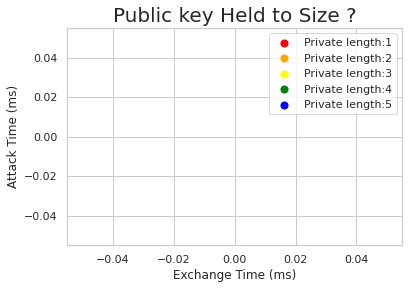

In [72]:
for i in range(len(private_sizes)):
    tempArr = static_public[np.where(static_public[:, 3] == private_sizes[i])]
    scatter = plt.scatter(tempArr[:,0], tempArr[:,1], c=colors[i], s = 50, label='Private length:' + str(private_sizes[i]))
plt.xlabel("Exchange Time (ms)", size=12)
plt.ylabel("Attack Time (ms)", size=12)
plt.title('Public key Held to Size ?', size=20)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


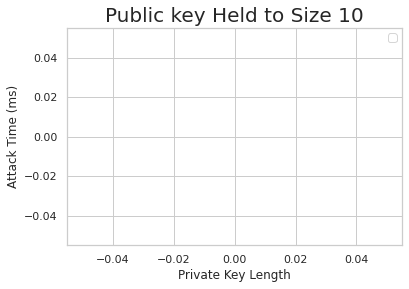

In [73]:
scatter = plt.scatter(static_public[:,3], static_public[:,1], s = 50, c="black")
plt.xlabel("Private Key Length", size=12)
plt.ylabel("Attack Time (ms)", size=12)
plt.title(f'Public key Held to Size {constant_public}', size=20)
plt.legend()
plt.show()

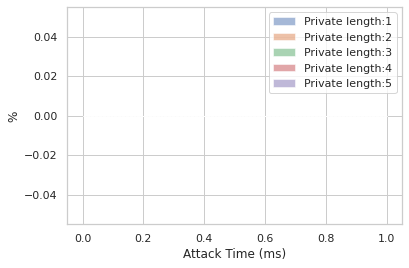

In [80]:
bins = np.linspace(0, 1, 80)
for i in range(len(private_sizes)):
    tempArr = static_public[np.where(static_public[:, 3] == private_sizes[i])]
    scatter = plt.hist(tempArr[:,1], bins, alpha=0.5, label='Private length:' + str(private_sizes[i]))
plt.xlabel("Attack Time (ms)", size=12)
#plt.xscale('log')
plt.ylabel("%", size=12)
plt.legend()
plt.show()

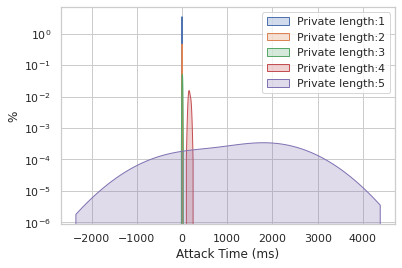

In [75]:
df = pd.DataFrame(arr, columns=['Public Key Length', 'Private Key Length', 'Exchange Time', 'Attack Time'])
for skl in private_sizes:
    df2 = df[df['Private Key Length'] == skl]
    fig = sns.kdeplot(df2['Attack Time'], fill=True, label='Private length:' + str(skl))
plt.xlabel("Attack Time (ms)", size=12)
plt.ylabel("%", size=12)
plt.yscale('log')
plt.legend()
plt.show()

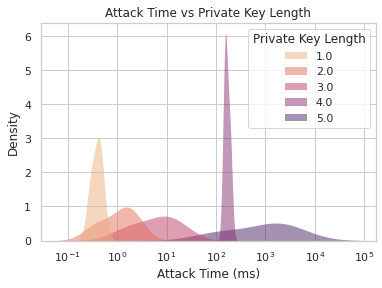

In [76]:
sns.set_theme(style="whitegrid")
df = pd.DataFrame(arr, columns=['Public Key Length', 'Private Key Length', 'Exchange Time', 'Attack Time'])
gfg = sns.kdeplot(
   data=df, x="Attack Time", hue="Private Key Length",
   fill=True, common_norm=False, palette="flare",
   alpha=.5, linewidth=0, log_scale=True
)
gfg.set(title="Attack Time vs Private Key Length", xlabel="Attack Time (ms)")
# plt.savefig("attack_time_vs_private_key_length.pdf", bbox_inches='tight')
# plt.savefig("attack_time_vs_private_key_length.png", bbox_inches='tight')
plt.show()


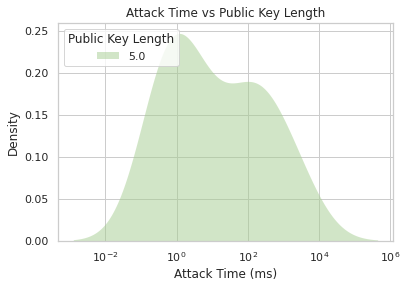

In [77]:
sns.set_theme(style="whitegrid")
df = pd.DataFrame(arr, columns=['Public Key Length', 'Private Key Length', 'Exchange Time', 'Attack Time'])
gfg = sns.kdeplot(
   data=df, x="Attack Time", hue="Public Key Length",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0, log_scale=True
)
sns.move_legend(gfg, "upper left")
gfg.set(title="Attack Time vs Public Key Length", xlabel="Attack Time (ms)")
# plt.savefig("attack_time_vs_public_key_length.pdf", bbox_inches='tight')
# plt.savefig("attack_time_vs_public_key_length.png", bbox_inches='tight')
plt.show()


AttributeError: 'JointGrid' object has no attribute 'axes'

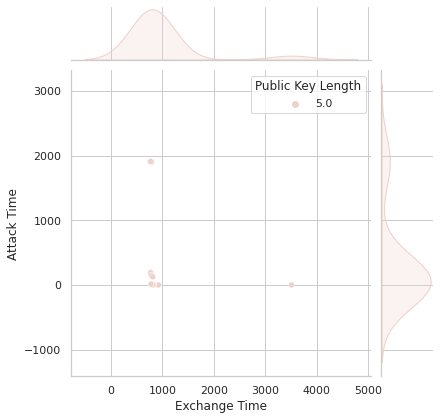

In [78]:
sns.set_theme(style="whitegrid")
df = pd.DataFrame(arr, columns=['Public Key Length', 'Private Key Length', 'Exchange Time', 'Attack Time'])
df = df[df['Exchange Time'] > min(df['Exchange Time'])]
gfg = sns.jointplot(data=df, x="Exchange Time", y="Attack Time", hue="Public Key Length")
gfg.set(title="Attack vs Exchange Time across Public Key Size")
plt.show()

AttributeError: 'JointGrid' object has no attribute 'axes'

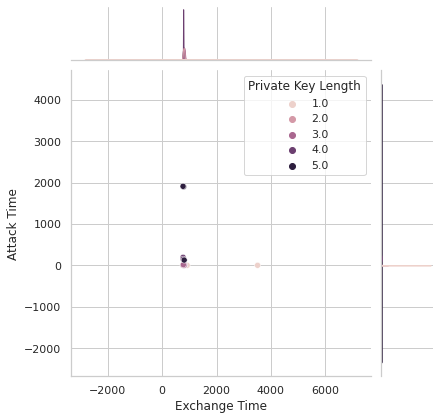

In [ ]:
sns.set_theme(style="whitegrid")
df = pd.DataFrame(arr, columns=['Public Key Length', 'Private Key Length', 'Exchange Time', 'Attack Time'])
gfg = sns.jointplot(data=df, x="Exchange Time", y="Attack Time", hue="Private Key Length")
gfg.set(title="Attack vs Exchange Time across Private Key Size")
plt.show()

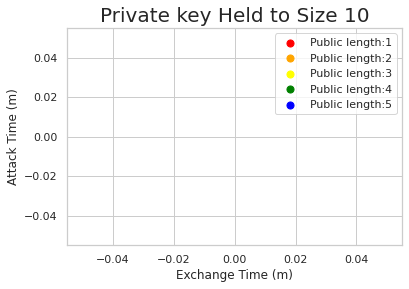

In [ ]:
for i in range(5):
    tempArr = static_private[np.where(static_private[:, 2] == public_sizes[i])]
    scatter = plt.scatter(tempArr[:,0], tempArr[:,1], c=colors[i], s = 50, label='Public length:' + str(public_sizes[i]))
plt.xlabel("Exchange Time (ms)", size=12)
plt.ylabel("Attack Time (ms)", size=12)
plt.title('Private key Held to Size ?', size=20)
plt.legend()
plt.show()

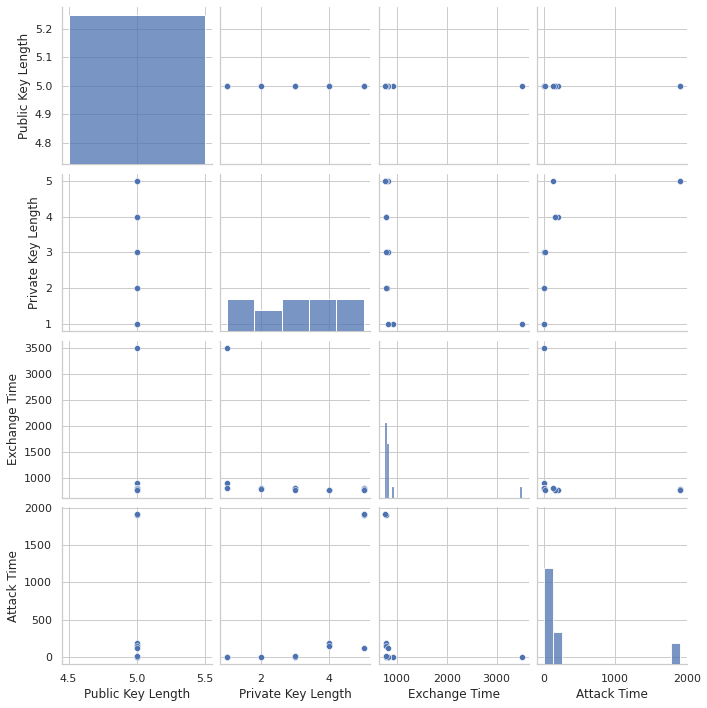

In [ ]:
sns.set_theme(style="whitegrid")
df = pd.DataFrame(arr, columns=['Public Key Length', 'Private Key Length', 'Exchange Time', 'Attack Time'])
df = df[df['Exchange Time'] > min(df['Exchange Time'])]
gfg = sns.pairplot(data=df)
plt.show()
# plt.savefig("pairplot_public_key_size.png")